## Getting the data from the yfinance api
- yfinance is a Python library that allows you to easily download stock market data from Yahoo Finance. It’s widely used for finance, trading, and machine learning projects involving historical or real-time stock prices.

In [1]:
# !pip install yfinanceb

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ------ --------------------------------- 0.5/3.0 MB 2.2 MB/s eta 0:00:02
     ---------- ----------------------------- 0.8/3.0 MB 2.2 MB/s eta 0:00:02
     ----------------- ---------------------- 1.3/3.0 MB 2.3 MB/s eta 0:00:01
     ------------------------ --------------- 1.8/3.0 MB 2.2 MB/s eta 0:00:01
     ------------------------------- -------- 2.4/3.0 MB 2.2 MB/s eta 0:00:01
     -------------------------------------- - 2.9/3.0 MB 2.2 MB/s eta 0:00:01
     ---------------------------------------- 3.0/3.0 MB 2.2 MB/s  0:00:01
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata 

  DEPRECATION: Building 'multitasking' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'multitasking'. Discussion can be found at https://github.com/pypa/pip/issues/6334


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime

## 1. Data Collection 

In [23]:
now = datetime.now()
ticker = 'AAPL'
start = datetime(now.year - 10, now.month, now.day)
end = now
df = yf.download(ticker, start, end)

C:\Users\DELL\AppData\Local\Temp\ipykernel_3840\44757265.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start, end)
[*********************100%***********************]  1 of 1 completed


In [24]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-11-23,26.548967,26.995397,26.456524,26.891679,129930000
2015-11-24,26.803741,26.909712,26.406917,26.454266,171212800
2015-11-25,26.612095,26.882659,26.587293,26.878148,85553200
2015-11-27,26.562496,26.697779,26.515148,26.670722,52185600
2015-11-30,26.672977,26.923248,26.548969,26.603081,156721200


In [25]:
df.tail()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2025-11-14,272.410004,275.959991,269.600006,271.049988,47431300
2025-11-17,267.459991,270.489990,265.730011,268.820007,45018300
2025-11-18,267.440002,270.709991,265.320007,269.989990,45677300
2025-11-19,268.559998,272.209991,265.500000,265.529999,40424500
2025-11-20,266.250000,275.429993,265.920013,270.829987,45693900


## 2. Data Exploration & Visualization

In [32]:
df.shape

((2514, 5),
 Price           Close       High        Low       Open     Volume
 Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
 Date                                                             
 2015-11-23  26.548967  26.995397  26.456524  26.891679  129930000
 2015-11-24  26.803741  26.909712  26.406917  26.454266  171212800
 2015-11-25  26.612095  26.882659  26.587293  26.878148   85553200
 2015-11-27  26.562496  26.697779  26.515148  26.670722   52185600
 2015-11-30  26.672977  26.923248  26.548969  26.603081  156721200)

In [30]:
df.isna().sum()

Price   Ticker
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64

In [31]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,2514.000000,2514.000000,2514.000000,2514.000000,2.514000e+03
mean,111.597864,112.712634,110.372582,111.492954,1.030230e+08
std,71.942655,72.642151,71.169459,71.869869,5.829160e+07
min,20.604073,20.907414,20.405651,20.526533,2.323470e+07
25%,40.999966,41.300752,40.682759,40.956817,6.313702e+07
50%,117.486897,118.938638,115.880854,117.305788,8.989470e+07
75%,170.687733,171.817729,168.662116,170.183862,1.262382e+08
max,275.250000,277.051436,272.089996,276.721738,5.334788e+08


In [21]:
df.dtypes

Price   Ticker
Close   AAPL      float64
High    AAPL      float64
Low     AAPL      float64
Open    AAPL      float64
Volume  AAPL        int64
dtype: object

In [34]:
df = df.reset_index()

In [35]:
df.head()

Price,index,Date,Close,High,Low,Open,Volume
Ticker,,,AAPL,AAPL,AAPL,AAPL,AAPL
0,0,2015-11-23,26.548967,26.995397,26.456524,26.891679,129930000
1,1,2015-11-24,26.803741,26.909712,26.406917,26.454266,171212800
2,2,2015-11-25,26.612095,26.882659,26.587293,26.878148,85553200
3,3,2015-11-27,26.562496,26.697779,26.515148,26.670722,52185600
4,4,2015-11-30,26.672977,26.923248,26.548969,26.603081,156721200


Text(0, 0.5, 'Closing Price')

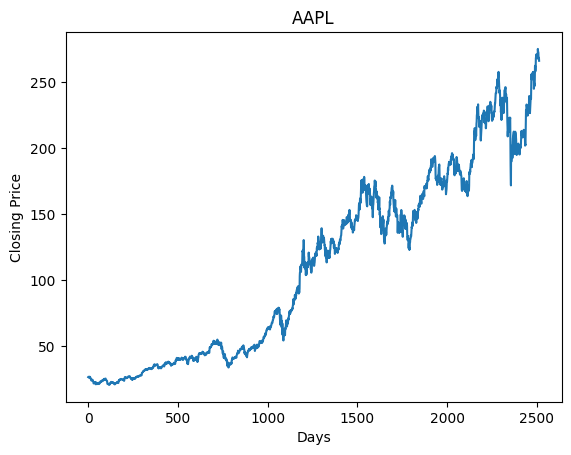

In [37]:
plt.figure()
plt.plot(df.Close)
plt.title(ticker)
plt.xlabel('Days')
plt.ylabel('Closing Price')

## 3. Feature Engineering

In [38]:
## 100 daysmoving average
df['MA_100'] = df.Close.rolling(100).mean()

Text(0, 0.5, 'Closing Price')

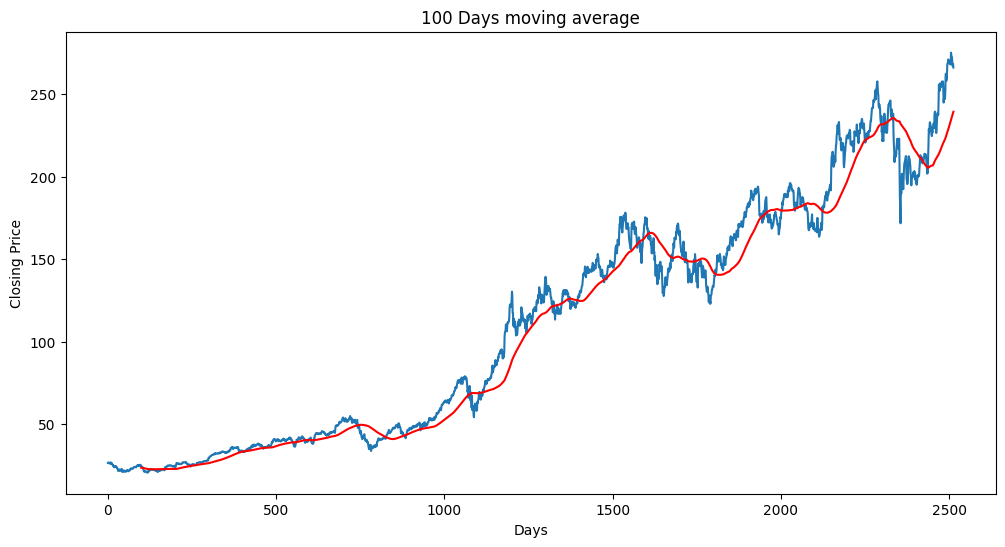

In [47]:

plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(df.MA_100, 'r')
plt.title('100 Days moving average')
plt.xlabel('Days')
plt.ylabel('Closing Price')

### Caluculating percentage change in each trading session 

In [42]:
df['Percentage Changed'] = df.Close.pct_change()

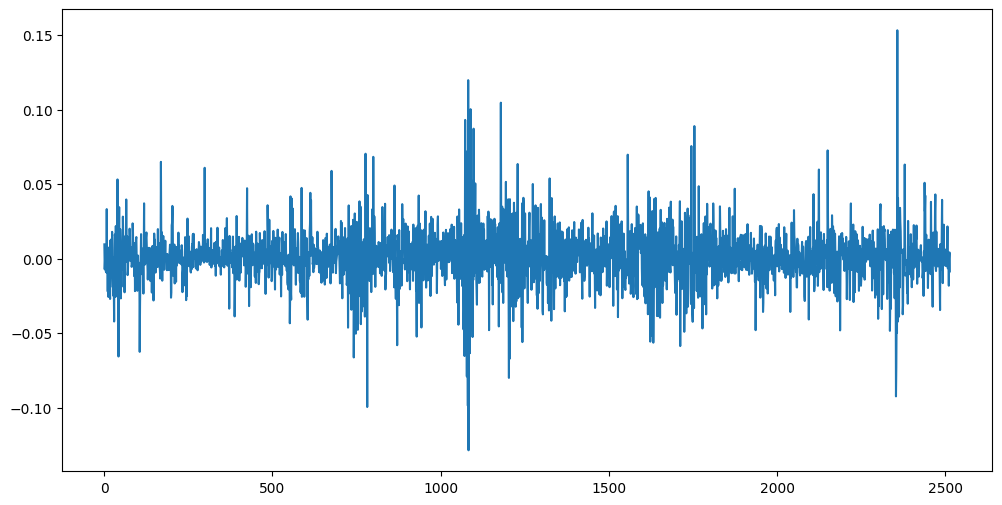

In [46]:
plt.figure(figsize=(12,6))
plt.plot(df['Percentage Changed'])

## 3. Data Preprocessing

In [51]:
# !pip install scikit-learn
# !pip install keras
df.shape

(2514, 9)

In [52]:
## Splitting the data into training and testing sets
data_training = pd.DataFrame(df.Close[0:int(len(df)*0.7)])
data_testing = pd.DataFrame(df.Close[int(len(df)*0.7): len(df)])

In [59]:
data_training.shape, data_testing.shape


((1759, 1), (755, 1))

In [64]:
print(data_training)

(1759, 1)


In [63]:
print(data_testing.)

(755, 1)


### Scalling down the data between 0 and 1

In [67]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [69]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.03770557],
       [0.03932148],
       [0.03810596],
       ...,
       [0.79580895],
       [0.80680576],
       [0.7989956 ]], shape=(1759, 1))

## Sequence Creation

In [70]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100 : i])
    y_train.append(data_training_array[i,0])
    

In [71]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [77]:
x_train.ndim, x_train.shape

(3, (1659, 100, 1))

In [78]:
y_train.ndim, y_train.shape

(1, (1659,))

## 6.Model Building

In [80]:
# !pip install tensorflow

  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached tensorboard-2.20.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
   ---------------------------------------- 0.0/332.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/332.0 MB 2.0 MB/s eta 0:02:44
   ---------------------------------------- 1.3/332.0 MB 3.4 MB/s eta 0:01:37
   ---------------------------------------- 2.6/332.0 MB 4.3 MB/s eta 0:01:18
    --------------------------------------- 4.2/332.0 MB 5.1 MB/s eta 0:01:04
    --------------------------------------- 5.8/332.0 MB 5.8 MB/s eta 0:00:57
    ---------------------------------------

In [81]:
import tensorflow as tf
print(tf.__version__)

2.20.0


In [83]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Input 

In [85]:
model = Sequential()

model.add(Input(shape=(100,1)))
model.add(LSTM(units=128, activation='tanh', return_sequences=True))
model.add(LSTM(units=64))
model.add(Dense(25))
model.add(Dense(1))

## 7. Model trainning

In [88]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [89]:
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 100ms/step - loss: 0.0123
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 98ms/step - loss: 6.0477e-04
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 102ms/step - loss: 6.4946e-04
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 101ms/step - loss: 6.2810e-04
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 101ms/step - loss: 5.5846e-04
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 102ms/step - loss: 5.2351e-04
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 99ms/step - loss: 4.8111e-04
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - loss: 6.1274e-04
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - loss: 4.8230e-04
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - loss: 4.5672e-04
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 93ms/step - loss: 4.3928e-04
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 101ms/step - loss: 4.4812e-04
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 93ms/step - loss: 4.4258e-04
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - loss: 3.9685e-04
Epoch 1

In [90]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [91]:
## saving the model
model.save('stock_prediction_model.keras')

## 8. Preparing the test data

In [92]:
past_100_days = data_training.tail(100)

In [93]:
final_df = pd.concat([past_100_days, data_testing], ignore_index = True)

In [94]:
final_df

Ticker,AAPL
0,134.985657
1,136.743652
2,134.278473
3,136.448975
4,139.032043
...,...
850,272.410004
851,267.459991
852,267.440002
853,268.559998


In [95]:
#lets scale this data
input_data = scaler.fit_transform(final_df)

In [96]:
input_data.shape

(855, 1)

In [98]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i,0])


In [99]:
x_test, y_test = np.array(x_test), np.array(y_test) 

In [103]:
x_test[0].shape, y_test.shape

((100, 1), (755,))

## 9. Making predictions

In [104]:
y_predicted = model.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step


In [105]:
## converting the data into its original form
y_predicted = scaler.inverse_transform(y_predicted.reshape(-1,1)).flatten()
y_test = scaler.inverse_transform(y_test.reshape(-1,1)).flatten()


In [106]:
y_predicted

array([146.68982 , 147.24193 , 147.82964 , 146.69464 , 146.69215 ,
       147.29613 , 146.47404 , 144.1162  , 141.28287 , 142.41434 ,
       143.99153 , 144.83356 , 144.68042 , 142.82317 , 140.62321 ,
       139.95728 , 139.66582 , 140.52312 , 141.6804  , 141.50346 ,
       138.43927 , 135.33255 , 132.6664  , 131.0988  , 131.47302 ,
       131.01694 , 130.42479 , 129.37743 , 127.24837 , 126.79875 ,
       126.99439 , 125.66906 , 124.84909 , 123.990845, 124.870995,
       126.08222 , 127.15867 , 128.76558 , 129.9069  , 130.98477 ,
       132.06342 , 132.46124 , 132.5607  , 133.50414 , 135.51056 ,
       137.5608  , 138.55923 , 139.76042 , 141.31123 , 141.08646 ,
       141.11781 , 141.65239 , 144.34337 , 147.99065 , 149.03638 ,
       150.40964 , 149.94102 , 148.85847 , 148.31978 , 149.41808 ,
       150.06096 , 151.34656 , 151.42992 , 150.73694 , 148.38542 ,
       147.03134 , 146.6845  , 145.5351  , 145.3042  , 145.13919 ,
       144.18065 , 143.74754 , 145.775   , 148.66783 , 149.478

In [107]:
y_test


array([148.47999573, 149.04153442, 145.81027222, 147.94801331,
       148.82481384, 145.90879822, 142.07659912, 139.07192993,
       145.82998657, 146.10580444, 145.61325073, 144.45079041,
       140.78605652, 138.84536743, 140.52993774, 140.04722595,
       142.34259033, 143.30802917, 141.081604  , 134.47131348,
       132.51087952, 130.40270996, 130.33377075, 133.43695068,
       130.26480103, 129.90029907, 128.0974884 , 124.16679382,
       127.68372345, 127.9989624 , 123.21121216, 124.48202515,
       123.16194153, 127.69356537, 128.21568298, 128.78707886,
       131.50605774, 131.42726135, 132.75715637, 133.91964722,
       133.20053101, 133.2596283 , 135.82096863, 139.01281738,
       140.41171265, 139.75166321, 141.82044983, 143.76113892,
       140.87472534, 142.14555359, 143.26861572, 148.57850647,
       152.20384216, 149.47497559, 152.35159302, 149.66215515,
       148.62776184, 148.99281311, 151.79489136, 151.15357971,
       153.25512695, 151.65678406, 150.51226807, 146.49

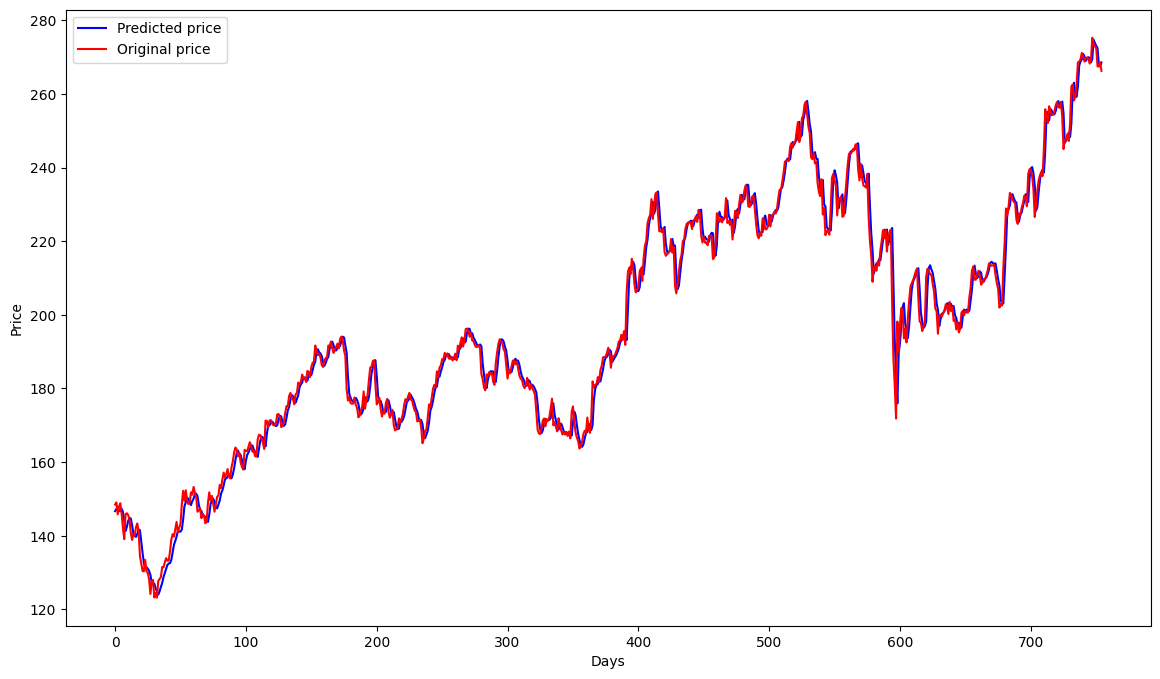

In [110]:
plt.figure(figsize=(14, 8))
plt.plot(y_predicted, 'b', label='Predicted price')
plt.plot(y_test, 'r', label='Original price' )
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()

## 10. Model evaluation




In [112]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_predicted)
print('Mean Squared error (MSE): ',mse)

Mean Squared error(MSE):  12.262098517200357


In [113]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_predicted)
print('R2 score: ', r2)

R2 score:  0.9890589469570635


## Multivariate LSTM


In [115]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [118]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']
df_features = df[features].copy()

In [119]:
split_ratio = 0.7  # 70% train, 30% test
split_index = int(len(df_features) * split_ratio)

train_df = df_features.iloc[:split_index].values
test_df  = df_features.iloc[split_index:].values

In [121]:
# 4. Scale all features together
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(train_df)             # fit only on train data

train_scaled = scaler.transform(train_df)
test_scaled  = scaler.transform(test_df)


In [122]:
# 5. Helper to build sequences (X: sequences of timesteps with all features; y: the Close column value)
def create_sequences(data_scaled, timesteps, target_col_index):
    X, y = [], []
    for i in range(timesteps, len(data_scaled)):
        X.append(data_scaled[i-timesteps:i, :])     # shape (timesteps, n_features)
        y.append(data_scaled[i, target_col_index])  # target is scaled Close value
    return np.array(X), np.array(y)

timesteps = 60
n_features = len(features)
target_col = 'Close'
target_index = features.index(target_col)

# Build train sequences
X_train, y_train = create_sequences(train_scaled, timesteps, target_index)

# For test sequences we need to concatenate last `timesteps` rows of train to start of test
# so sequences in test have proper previous context.
combined = np.vstack([train_scaled[-timesteps:], test_scaled])
X_test, y_test = create_sequences(combined, timesteps, target_index)
# Note: y_test corresponds to scaled Close values for the test part


In [123]:
# 6. Build the LSTM model (multivariate input)
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(timesteps, n_features)))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1))   # predict the Close (scaled)

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
model.summary()


D:\Google\Anaconda\envs\djangoEnv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 60, 100)             │          42,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 60, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 50)                  │          30,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 72,651 (283.79 KB)

 Trainable params: 72,651 (283.79 KB)

 Non-trainable params: 0 (0.00 B)

In [124]:
# 7. Train
es = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.1,
    callbacks=[es],
    verbose=1
)


Epoch 1/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 6s 68ms/step - loss: 0.0123 - mae: 0.0608 - val_loss: 0.0030 - val_mae: 0.0437
Epoch 2/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - loss: 0.0029 - mae: 0.0330 - val_loss: 0.0057 - val_mae: 0.0638
Epoch 3/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - loss: 0.0024 - mae: 0.0307 - val_loss: 0.0024 - val_mae: 0.0398
Epoch 4/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - loss: 0.0020 - mae: 0.0276 - val_loss: 0.0022 - val_mae: 0.0396
Epoch 5/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - loss: 0.0019 - mae: 0.0267 - val_loss: 0.0028 - val_mae: 0.0435
Epoch 6/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - loss: 0.0018 - mae: 0.0262 - val_loss: 0.0024 - val_mae: 0.0403
Epoch 7/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - loss: 0.0016 - mae: 0.0258 - val_loss: 0.0018 - val_mae: 0.0352
Epoch 8/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 0.0014 - mae: 0.0237 - val_loss: 0.0028 - val_mae: 0.0428
Epoch 9/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - lo

In [129]:
# 10. Evaluate
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae  = mean_absolute_error(y_true, y_pred)
print(f"RMSE: {rmse:.4f}")
print(f"MAE : {mae:.4f}")
model.save("final_multivariate_LSTM_model.keras")


RMSE: 10.4900
MAE : 8.1052


In [127]:
# 9. Inverse transform scaled Close predictions back to original scale
# We trained scaler on ALL features; to inverse-transform a single feature,
# create a dummy array with same n_features, put predicted Close into Close column,
# inverse_transform and then extract Close column.

def inverse_transform_close(scaled_values, scaler, n_features, close_index):
    # scaled_values shape: (n_samples, )
    scaled_values = np.array(scaled_values).reshape(-1)
    zeros = np.zeros((len(scaled_values), n_features))
    zeros[:, close_index] = scaled_values
    inv = scaler.inverse_transform(zeros)
    return inv[:, close_index]

# inverse transform predicted and true y
y_pred = inverse_transform_close(y_pred_scaled.flatten(), scaler, n_features, target_index)
y_true = inverse_transform_close(y_test.flatten(), scaler, n_features, target_index)


In [126]:
# 8. Predict on X_test (scaled predictions)
y_pred_scaled = model.predict(X_test)  # shape (n_samples, 1)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
